## Dummy Data 생성
- sklearn.dataset 내에 있는 메소드들을 사용하여 모델 종류에 맞는 더미 데이터 생성 가능
- 종류

    | 메소드                        | 설명                                                                                       |
    |------------------------------|--------------------------------------------------------------------------------------------|
    | `make_classification`        | 분류 모델을 위한 가상 데이터셋 생성                                                          |
    | `make_regression`            | 회귀 모델을 위한 가상 데이터셋 생성                                                          |
    | `make_blobs`                 | 분류 모델을 위한 가상 데이터셋 생성                                           |
    | `make_moons`                 | 두 개의 반달 모양 데이터를 생성, 이진 분류에 사용                                            |
    | `make_circles`               | 두 개의 원형 데이터를 생성, 이진 분류에 사용                                                 |
    | `make_multilabel_classification` | 다중 레이블 분류 모델을 위한 가상 데이터셋 생성                                              |
    | `make_hastie_10_2`           | Hastie et al.의 10.2 장에 설명된 이진 분류 데이터를 생성                                      |
    | `make_friedman1`             | Friedman의 첫 번째 회귀 모델을 위한 데이터셋 생성                                             |
    | `make_friedman2`             | Friedman의 두 번째 회귀 모델을 위한 데이터셋 생성                                             |
    | `make_friedman3`             | Friedman의 세 번째 회귀 모델을 위한 데이터셋 생성                                             |
    | `make_sparse_coded_signal`   | 희소 코딩된 신호 데이터를 생성, 신호 처리에 사용                                              |
    | `make_sparse_uncorrelated`   | 희소 독립 변수로 구성된 데이터셋 생성                                                        |
    | `make_spd_matrix`            | 양의 정부호 행렬(positive-definite matrix) 생성                                              |
    | `make_low_rank_matrix`       | 낮은 계수의 행렬 생성                                                                        |
    | `make_swiss_roll`            | 3D 스위스 롤 형태의 데이터를 생성, 비선형 차원 축소에 사용                                    |
    | `make_s_curve`               | 3D S 곡선 형태의 데이터를 생성, 비선형 차원 축소에 사용                                       |
    | `make_biclusters`            | 바이클러스터 데이터셋 생성                                                                   |
    | `make_checkerboard`          | 격자 형태의 데이터셋 생성                                                   |

#### 1. make_classification

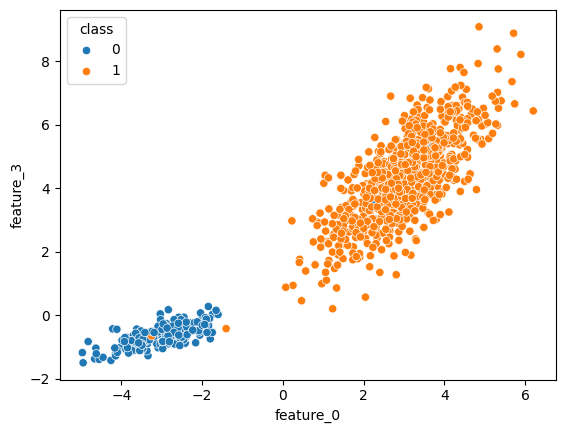

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# 데이터셋 생성
X, y = make_classification(
    n_classes=2,            # 생성할 클래스(레이블)의 수. 여기서는 2개(이진 분류).
    class_sep=3,            # 클래스 간의 분리도. 값이 클수록 클래스 간의 분리가 명확해짐.
    weights=[0.2, 0.8],     # 각 클래스의 비율. 첫 번째 클래스는 10%, 두 번째 클래스는 90%.
    n_informative=3,        # 분류에 유용한 정보성 특징(피처)의 수. 여기서는 3개.
    n_redundant=1,          # 다른 정보성 특징의 선형 조합으로 생성되는 중복 특징의 수. 여기서는 1개.
    n_features=5,           # 전체 특징의 수. 여기서는 20개.
    n_clusters_per_class=1, # 클래스당 클러스터의 수. 여기서는 1개.
    n_samples=1000,         # 생성할 샘플(데이터 포인트)의 수. 여기서는 1000개.
    random_state=10         # 난수 시드. 동일한 출력이 재현되도록 설정.
)

df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['class'] = y

sns.scatterplot(
    data=df,
    x='feature_0',
    y='feature_3',
    hue='class'
    )

plt.show()

#### 2. make_regression

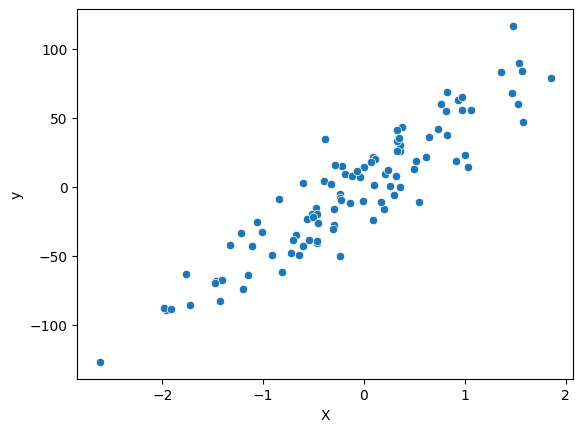

In [50]:
import numpy as np
from sklearn.datasets import make_regression

# 데이터셋 생성
X, y = make_regression(
    n_samples=100,        # 생성할 샘플 수
    n_features=1,         # 생성할 특징 수
    noise=20,             # 노이즈 수준
    random_state=42
)

df = pd.DataFrame(X, columns=['X'])
df['y'] = y

# 시각화
# plt.scatter(X, y, edgecolors='k')
# plt.title('make_regression')
sns.scatterplot(data=df, x='X', y='y')
plt.show()

#### 3. make_blobs

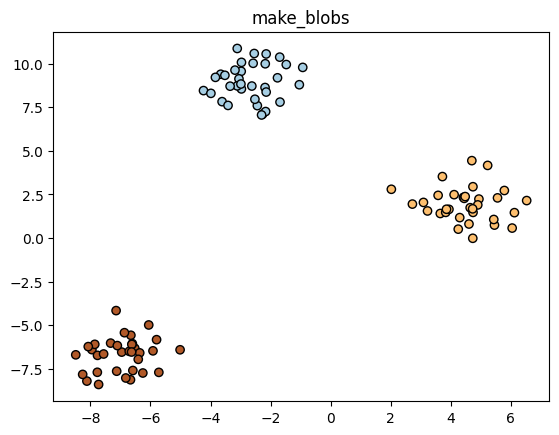

In [53]:
from sklearn.datasets import make_blobs

# 데이터셋 생성
X, y = make_blobs(
    n_samples=100,        # 생성할 샘플 수
    n_features=2,         # 생성할 특징 수
    centers=3,            # 클러스터 수
    cluster_std=1.0,      # 클러스터 표준 편차
    random_state=42
)

# 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('make_blobs')
plt.show()

#### 4. make_moons

<Axes: xlabel='0', ylabel='1'>

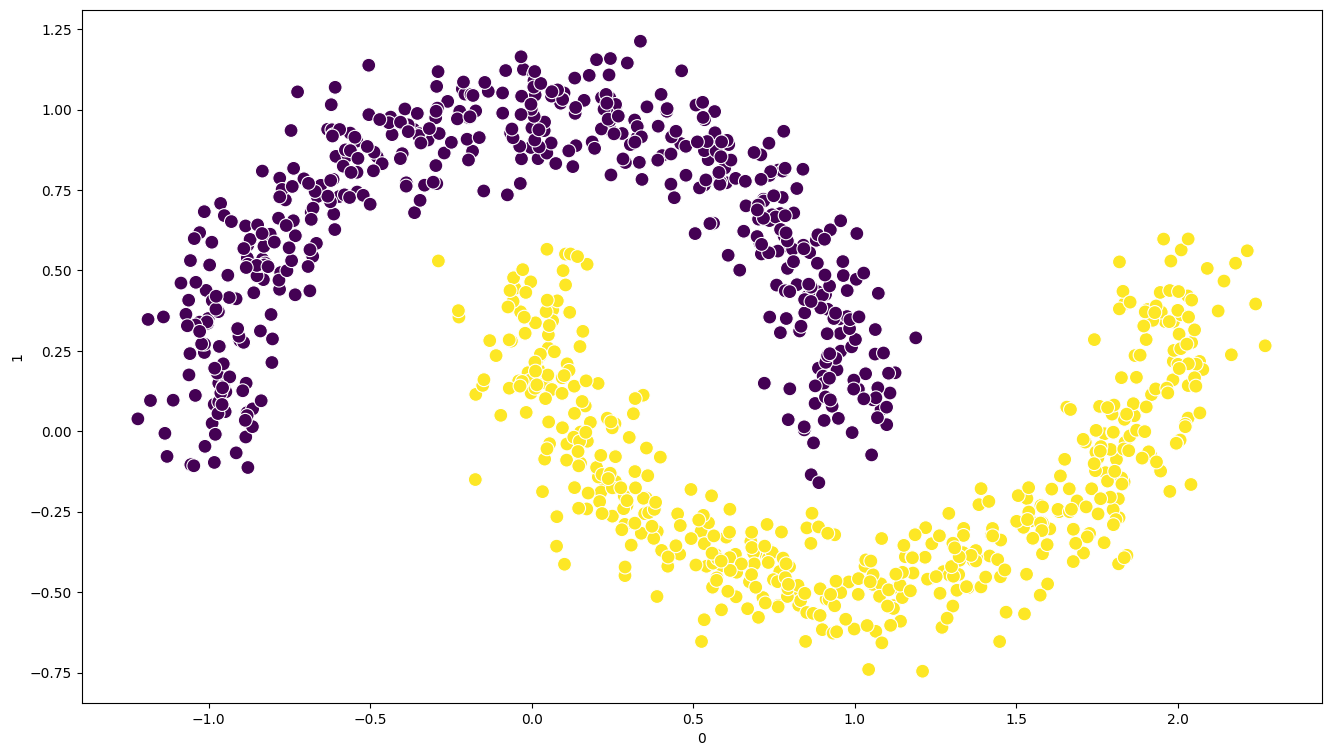

In [59]:
from sklearn.datasets import make_moons
import numpy as np
import seaborn as sns


X, y = make_moons(
    n_samples=1000,        # 생성할 샘플 수
    noise=0.1,            # 잡음의 크기. 0이면 정확한 반원을 이룸
    random_state=42
)

df = pd.DataFrame(X)

#시각화
plt.figure(figsize=(16, 9))
sns.scatterplot(x=df[0], y=df[1], c=y, marker='o', s=100)